In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('fraud_detection.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
rslt_df = df[df['isFraud'] ==1]
print(rslt_df.shape)
rslt_df

(8213, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [5]:
print(df['nameOrig'].nunique())
print(df['type'].unique())
print(df['nameDest'].nunique())

6353307
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
2722362


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df1=df.copy()
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
#ALMOST HAS A NEW VALUE TO EACH RECORD, NO CORRELATION WITH THE TARGET
del df['nameOrig']
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
#ONE HOT ENCODING TYPE COLUMN
type_new = pd.get_dummies(df['type'],drop_first=True)
df = pd.concat([df,type_new],axis=1)
del df['type']
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,C553264065,0.0,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,C38997010,21182.0,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0,0,1,0
5,1,7817.71,53860.00,46042.29,M573487274,0.0,0.00,0,0,0,0,1,0
6,1,7107.77,183195.00,176087.23,M408069119,0.0,0.00,0,0,0,0,1,0
7,1,7861.64,176087.23,168225.59,M633326333,0.0,0.00,0,0,0,0,1,0
8,1,4024.36,2671.00,0.00,M1176932104,0.0,0.00,0,0,0,0,1,0
9,1,5337.77,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0,1,0,0


In [10]:
df['nameDest']=df['nameDest'].str[:1]
nameDest_new = pd.get_dummies(df['nameDest'])
df = pd.concat([df,nameDest_new],axis=1)
del df['nameDest']
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0,0,1


In [11]:
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,0,1,0,0,1
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,0,1,0,0,1
2,1,181.00,181.00,0.00,0.0,0.00,1,0,0,0,0,1,1,0
3,1,181.00,181.00,0.00,21182.0,0.00,1,0,1,0,0,0,1,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,0,1,0,0,1
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,0,1,0,0,1
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,0,1,0,0,1
7,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,0,1,0,0,1
8,1,4024.36,2671.00,0.00,0.0,0.00,0,0,0,0,1,0,0,1
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,0,1,0,0,1,0


In [12]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
C                   uint8
M                   uint8
dtype: object

In [13]:
# compute the pair wise correlation for all columns  
#correlation_matrix = df.corr(method='pearson').round(2)
 
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
#sns.heatmap(data=correlation_matrix, annot=True)

#plt.title('Pearson pair-wise Correlation Matrix')
#plt.show()

In [14]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'C', 'M'],
      dtype='object')

In [15]:
sc=StandardScaler()
col_names=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','isFlaggedFraud','CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'C', 'M']
features=df[col_names]
scaler=sc.fit(features.values)
scaled_features = scaler.transform(features.values)
df[col_names] = scaled_features
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,-0.001586,-0.736484,-0.08096,1.399036,-0.302345,-1.399036,1.399036
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,-0.001586,-0.736484,-0.08096,1.399036,-0.302345,-1.399036,1.399036
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,-0.001586,-0.736484,-0.08096,-0.714778,3.307478,0.714778,-0.714778
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,-0.001586,1.357803,-0.08096,-0.714778,-0.302345,0.714778,-0.714778
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,-0.001586,-0.736484,-0.08096,1.399036,-0.302345,-1.399036,1.399036


In [16]:
df=df.sample(n=80000, replace=False, random_state=1)

X=pd.DataFrame(np.c_[df['step'], df['amount'], df['oldbalanceOrg'], df['newbalanceOrig'],df['oldbalanceDest'],df['newbalanceDest'],df['isFlaggedFraud'],df['CASH_OUT'],df['DEBIT'],df['PAYMENT'],df['TRANSFER'],df['C'],df['M']], columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','isFlaggedFraud','CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'C', 'M'])
Y = df['isFraud']
print(Y.value_counts())

X2, X_test, Y2, Y_test = train_test_split(X, Y, test_size=20000, random_state=5,stratify=Y)



print(X2.shape)
Y.head()
print(Y_test.value_counts())

0    79891
1      109
Name: isFraud, dtype: int64
(60000, 13)
0    19973
1       27
Name: isFraud, dtype: int64


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
def SVM(X,Y):
    kernels=['linear','poly','poly','poly','poly','poly','poly','rbf','sigmoid']
    #kernels=['linear','poly','poly','rbf']
    degrees=[1,2,3,4,5,6,7,8,9]
    #degrees=[1,2,3,4]
    lambdas=np.arange(0.1,1.1,0.1)
    #lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
    deg_idx=[]
    l_idx=[]
    k_idx=[]
    acc_idx=[]
    pre_idx=[]
    precisions=[]
    
    for i in range(len(kernels)):
        for lamda in lambdas:
            cv = KFold(n_splits=10, shuffle=True)
            clf = svm.SVC(kernel= kernels[i], degree=degrees[i], C=lamda)
            accuracies=[]
            for train_index, test_index in cv.split(X):
                #print("TRAIN:", train_index, "TEST:", test_index)
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                accuracy= metrics.accuracy_score(y_test, y_pred)
                precision=metrics.precision_score(y_test, y_pred)
                precisions.append(precision)
                accuracies.append(accuracy)
            print(accuracies)
            acc_idx.append(max(accuracies))
            pre_idx.append(max(precisions))
            deg_idx.append(degrees[i])
            l_idx.append(lamda)
            k_idx.append(kernels[i])
        print("--------------------------------------")
        
    print(acc_idx)
    print(pre_idx)
    best_acc=max(acc_idx)
    idx=acc_idx.index(best_acc)
    
    print("Best Accuracy is: "+str(best_acc) + "\n" + "Kernel: "+str(k_idx[idx]) +"\n" + "Degree= "+str(deg_idx[idx]) +"\n" + "Lamda= " + str(l_idx[idx]))
            
            

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
def SVM2(X,Y):
    kernels=['linear','poly','poly','poly','poly','poly','poly','poly','rbf','sigmoid']
    #kernels=['linear','poly','poly','rbf']
    degrees=[1,2,3,4,5,6,7,8,9,10]
    #degrees=[1,2,3,4]
    #lambdas=np.arange(0.1,1.1,0.1)
    #lambdas=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
    deg_idx=[]
    k_idx=[]
    acc_idx=[]
    recall_idx=[]
    recalls=[]
    best_recall=0
    #print(X.shape)
    for i in range(len(kernels)):
        kernel_=kernels[i]
        degree_=degrees[i]
        skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        accuracies=[]
        for train_index, val_index in skf.split(X,Y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
            #print(y_val.value_counts())
            #print(y_train.value_counts())
            clf = svm.SVC(kernel= kernel_, degree=degree_)
            clf.fit(X_train, y_train)
            y_train_pred=clf.predict(X_train)
            y_pred = clf.predict(X_val)
            #print(X_train.shape)
            #print(X_val.shape)
            accuracy= metrics.accuracy_score(y_val, y_pred)
            precision,recall,fscore,support=score(y_val,y_pred,average='macro')
            recalls.append(recall)
            accuracies.append(accuracy)
        #print(accuracies)
        acc_idx.append(max(accuracies))
        recall_idx.append(max(recalls))
        deg_idx.append(degrees[i])
        k_idx.append(kernels[i])
        #plot_confusion_matrix(clf, X_val, y_val)
        #plt.show()
        print("Kernel: "+ kernels[i] + " Degree "+ str(degrees[i]) + " done.")
    print(acc_idx)
    print(recall_idx)
    best_acc=max(acc_idx)
    best_recall=max(recall_idx)
    idx=recall_idx.index(best_recall)
    
    print("Best Accuracy is: "+str(best_acc) + "\n" + "Kernel: "+str(k_idx[idx]) +"\n" + "Degree= "+str(deg_idx[idx]))
    
    return[k_idx[idx],deg_idx[idx],best_acc]

In [19]:
[kernel,degree,acc]=SVM2(X2,Y2)

Kernel: linear Degree 1 done.
Kernel: poly Degree 2 done.
Kernel: poly Degree 3 done.
Kernel: poly Degree 4 done.
Kernel: poly Degree 5 done.
Kernel: poly Degree 6 done.
Kernel: poly Degree 7 done.
Kernel: poly Degree 8 done.
Kernel: rbf Degree 9 done.
Kernel: sigmoid Degree 10 done.
[0.999, 0.999, 0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9993333333333333, 0.9993333333333333, 0.999, 0.9985]
[0.6666666666666666, 0.6666666666666666, 0.6875, 0.6875, 0.6875, 0.6875, 0.75, 0.75, 0.75, 0.75]
Best Accuracy is: 0.9993333333333333
Kernel: poly
Degree= 7


In [20]:
def tune_lambda(X,Y,kernel,degree):
    lambdas=np.arange(0.3,1.1,0.1)
    acc_idx=[]
    recall_idx=[]
    l_idx=[]
    best_recall=0
    recalls=[]
    for lamda in lambdas:
        #print(lamda)
        skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        accuracies=[]
        recalls=[]
        for train_index, val_index in skf.split(X, Y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
            clf = svm.SVC(kernel= kernel, degree=degree, C=lamda)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_val)
            accuracy= metrics.accuracy_score(y_val, y_pred)
            precision,recall,fscore,support=score(y_val,y_pred,average='macro')
            recalls.append(recall)
            accuracies.append(accuracy)
        #print(accuracies)
        acc_idx.append(max(accuracies))
        recall_idx.append(max(recalls))
        l_idx.append(lamda)
    print(acc_idx)
    print(recall_idx)
    best_acc=max(acc_idx)
    best_recall=max(recall_idx)
    idx=recall_idx.index(best_recall)
    l_best=l_idx[idx]
    print("Best lambda is: "+str(l_best))
    return l_best

In [21]:
print(kernel)
lamda=tune_lambda(X2,Y2,kernel,degree)

poly
[0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9991666666666666, 0.9993333333333333, 0.9993333333333333]
[0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.6875, 0.75, 0.75]
Best lambda is: 0.9000000000000001


In [22]:
#TESTING
clf = svm.SVC(kernel= kernel, degree=degree, C=lamda)
clf.fit(X2, Y2)
y_pred = clf.predict(X_test)
accuracy= metrics.accuracy_score(Y_test, y_pred)
precision,recall,fscore,support=score(Y_test,y_pred,average='macro')
print(accuracy)
print(recall)
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))


0.9991
0.6851601513895611


{0: 19989, 1: 11}

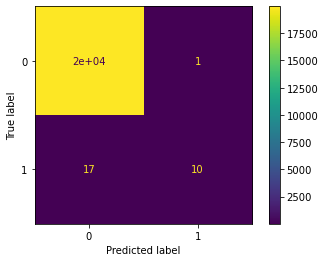

In [23]:
plot_confusion_matrix(clf, X_test, Y_test)